In [1]:
#importing required packages
import tensorflow as tf # Imports the TensorFlow library, which is commonly used for building and training deep learning models.
from keras.models import Sequential # Imports the Sequential model from Keras, a high-level deep learning framework.
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D # Imports specific layer types used in building neural networks.
import matplotlib.pyplot as plt # Loads and splits the dataset into training and testing sets.
import numpy as np #


In [2]:
# a. laoding and preprocessing image data
mnist=tf.keras.datasets.mnist # Loads the MNIST dataset from TensorFlow/Keras, which contains grayscale images of handwritten digits.
(x_train,y_train),(x_test,y_test)=mnist.load_data() # Loads and splits the dataset into training and testing sets.
input_shape=(28,28,1) # Defines the input shape for the model, which corresponds to a 28x28 pixel image with a single channel (grayscale).

#making sure that values are float so that we can get decimal points after division
# for below lines
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1): This line reshapes the training data x_train to have dimensions (number_of_samples, 28, 28, 1). The reshaping is necessary to match the input shape expected by the convolutional layer of the neural network. The 1 at the end indicates that each image is a single-channel (grayscale) image.
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1): Similarly, this line reshapes the testing data x_test to the same dimensions as the training data.
# print("Data type of x_train : " , x_train.dtype): This line prints the data type of the training data before any conversions. The data type is checked to ensure that it matches the expectations for further processing.
# x_train = x_train.astype('float32'): It converts the data type of x_train to float32. Neural networks often work with floating-point values, and this line ensures that the data type is appropriate for the subsequent calculations.
# x_test = x_test.astype('float32'): Similar to the previous line, it converts the data type of x_test to float32.
# print("Datatype after converting : ", x_train.dtype): After the conversion, this line prints the data type of the training data again to confirm that it is now of type float32.
# x_train = x_train / 255: This line normalizes the pixel values of the training data by dividing them by 255. Normalization scales the pixel values to be in the range [0, 1], which is a common practice in deep learning to improve the convergence of the model during training.
# x_test = x_test / 255: Similarly, it normalizes the pixel values of the testing data.
# print("shape of training : ", x_train.shape): This line prints the shape of the training data to confirm the reshaping and normalization operations. It should show the shape as (number_of_samples, 28, 28, 1).
# print("shape of testing : " , x_test.shape): Likewise, it prints the shape of the testing data, which should match the shape of the training data after preprocessing.

x_train=x_train.reshape(x_train.shape[0], 28,28,1) #
x_test=x_test.reshape(x_test.shape[0], 28,28,1) #

print("Data type of x_train : " , x_train.dtype) #
x_train=x_train.astype('float32') #
x_test=x_test.astype('float32') #
print("Datatype after converting : ", x_train.dtype) #

#Normalizing the rgb codes by dividing it to the max rgb values
x_train=x_train / 255 #
x_test=x_test / 255 #

print("shape of training : ",x_train.shape) #
print("shape of testing : " , x_test.shape) #

11490434/11490434 [==============================] - 0s 0us/step
Data type of x_train :  uint8
Datatype after converting :  float32
shape of training :  (60000, 28, 28, 1)
shape of testing :  (10000, 28, 28, 1)


In [3]:
# # b. Defining the model architecture
# model = Sequential(): Creates a Sequential model to which you can add layers.
# The model architecture is defined as follows:
# Conv2D(28, kernel_size=(3,3), input_shape=input_shape): A convolutional layer with 28 filters and a kernel size of (3,3), accepting input with the specified shape.
# MaxPooling2D(pool_size=(2,2)): A max-pooling layer to down-sample the data.
# Flatten(): A flattening layer to convert the 2D data to a 1D vector.
# Dense(200, activation="relu"): A fully connected (dense) layer with 200 neurons and ReLU activation.
# Dropout(0.3): A dropout layer with a 30% dropout rate, which helps prevent overfitting.
# Dense(10, activation="softmax"): The output layer with 10 neurons and a softmax activation for multi-class classification.

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

model.summary() # Prints a summary of the model's architecture, showing the structure of the layers, the number of parameters, and the output shapes.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [4]:
# c.training the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']): Compiles the model by specifying the optimization algorithm ('adam'), the loss function ('sparse_categorical_crossentropy') suitable for classification, and the evaluation metric ('accuracy').

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #
model.fit(x_train,y_train,epochs=2) #


# d.estimating the models performance
# model.fit(x_train, y_train, epochs=2): Trains the model on the training data for 2 epochs. The model learns to make predictions and adjusts its parameters to minimize the defined loss function.

test_loss,test_acc = model.evaluate(x_test,y_test) #
print("Loss=%.3f" %test_loss) #
print("Accuracy=%.3f" %test_acc) #

Epoch 1/2
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1988 - accuracy: 0.9402
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.0578 - accuracy: 0.9806
Loss=0.058
Accuracy=0.981


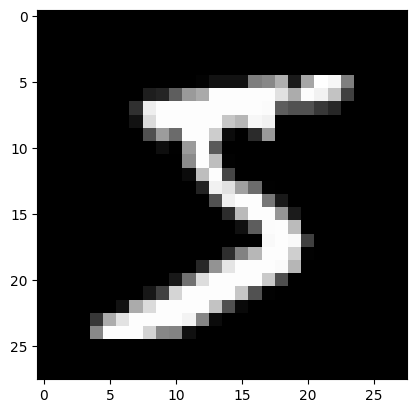

1/1 [==============================] - 0s 91ms/step
Predicted Class: 5


In [5]:
#showing image at position[] from dataset:
image = x_train[0] # Selects the first image from the training dataset.
plt.imshow(np.squeeze(image), cmap='gray') # Displays the image using Matplotlib. np.squeeze is used to remove the single-channel dimension, and cmap='gray' indicates a grayscale color map.
plt.show() # Shows the image.

#predicting the class of image
image=[image.reshape(1, image.shape[0], image.shape[1], image.shape[2])]
predict_model = model.predict(image)
print("Predicted Class: {}".format(np.argmax(predict_model)))

In [ ]:
# image = [image.reshape(1, image.shape[0], image.shape[1], image.shape[2])]: Reshapes the image to be compatible with model prediction.
# predict_model = model.predict([image]): Uses the trained model to make a prediction on the reshaped image.
# print("Predicted Class: {}".format(np.argmax(predict_model))): Prints the predicted class based on the highest probability in the prediction.
# image=x_train[0] #
# plt.imshow(np.squeeze(image), cmap='gray') #
# plt.show() #


# OUTPUT -->

# Data type of x_train :  uint8
# Datatype after converting :  float32
# shape of training :  (60000, 28, 28, 1)
# shape of testing :  (10000, 28, 28, 1)
# 2023-11-07 00:32:56.373899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
# To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #
# =================================================================
#  conv2d (Conv2D)             (None, 26, 26, 28)        280

#  max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0
#  D)

#  flatten (Flatten)           (None, 4732)              0

#  dense (Dense)               (None, 200)               946600

#  dropout (Dropout)           (None, 200)               0

#  dense_1 (Dense)             (None, 10)                2010

# =================================================================
# Total params: 948890 (3.62 MB)
# Trainable params: 948890 (3.62 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________
# Epoch 1/2
# 1875/1875 [==============================] - 55s 29ms/step - loss: 0.1623 - accuracy: 0.9517
# Epoch 2/2
# 1875/1875 [==============================] - 51s 27ms/step - loss: 0.0563 - accuracy: 0.9828
# 313/313 [==============================] - 1s 4ms/step - loss: 0.0637 - accuracy: 0.9804
# Loss=0.064
# Accuracy=0.980
# 1/1 [==============================] - 0s 104ms/step
# Predicted Class: 5


# Explanation

# Data Type and Preprocessing:

# Data type of x_train: uint8: This line indicates that the original data type of x_train is unsigned 8-bit integer (uint8). It's typical for image pixel values to be represented as integers in the range [0, 255].

# Datatype after converting: float32: After the conversion, this line confirms that the data type of x_train has been changed to 32-bit floating-point (float32). This is a common data type for deep learning operations.

# shape of training: (60000, 28, 28, 1): This line displays the shape of the training data after reshaping and normalization. It shows that the training data consists of 60,000 samples, each with a shape of 28x28 pixels and a single channel (grayscale).

# shape of testing: (10000, 28, 28, 1): Similar to the training data, this line shows the shape of the testing data, which consists of 10,000 samples with the same dimensions.

# TensorFlow Information:

# 2023-11-07 00:32:56.373899: I tensorflow/core/platform/cpu_feature_guard.cc:182: This is an informational message from TensorFlow, indicating that the TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

# To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.: This message suggests that you can enable additional CPU instructions for better performance, but it requires rebuilding TensorFlow with specific compiler flags.

# Model Summary:

# Model: "sequential": This line simply displays that the model being used is a Sequential model.

# The lines starting with "Layer (type)" provide a summary of the model's architecture. It shows the type of each layer in the model, the output shape of each layer, and the number of parameters in each layer.

# Model Training:

# Epoch 1/2: Indicates the start of the first training epoch, and it is expected to run for a total of 2 epochs.

# 1875/1875 [==============================] - 55s 29ms/step - loss: 0.1623 - accuracy: 0.9517: This line provides information about the first epoch:

# 1875/1875: Shows the progress in terms of batches processed out of the total 1875 batches in the training dataset.
# [==============================]: The progress bar, which fills as the training progresses.
# - 55s 29ms/step: Indicates that the first epoch took 55 seconds to complete and processed batches at an average rate of 29 milliseconds per batch.
# loss: 0.1623: The training loss at the end of the first epoch, which measures how well the model is fitting the training data.
# accuracy: 0.9517: The training accuracy at the end of the first epoch, representing the proportion of correctly classified training examples.
# Epoch 2/2: Indicates the start of the second training epoch.

# 1875/1875 [==============================] - 51s 27ms/step - loss: 0.0563 - accuracy: 0.9828: Similar to the previous line, this provides information about the second epoch. The training loss and accuracy are shown for this epoch.

# Model Evaluation:

# 313/313 [==============================] - 1s 4ms/step - loss: 0.0637 - accuracy: 0.9804: This line shows the evaluation of the model on the test data after training. It provides information such as:
# 313/313: Indicates the progress in terms of batches processed out of the total 313 batches in the test dataset.
# loss: 0.0637: The test loss, which measures how well the model generalizes to new data.
# accuracy: 0.9804: The test accuracy, indicating the model's performance on unseen data.
# Displaying an Image:

# image = x_train[0]: Selects the first image from the training dataset.

# plt.imshow(np.squeeze(image), cmap='gray'): Displays the image using Matplotlib. np.squeeze is used to remove the single-channel dimension, and cmap='gray' indicates a grayscale color map.

# plt.show(): Shows the image.

# Predicting the Class of the Image:

# 1/1 [==============================] - 0s 104ms/step: This line suggests that a single image is being predicted.

# Predicted Class: 5: The predicted class label for the displayed image. In this case, the model predicts that the image is of the digit '5'.

# This output demonstrates the complete process of building, training, evaluating, and using a deep learning model for image classification using the MNIST dataset. It provides insights into training and evaluation metrics and the model's architecture summary.